In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
sns.__version__

'0.11.0'

In [15]:
# Carregar dados
df = pd.read_csv('datasets/kyphosis.csv')

In [16]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


#Análise Exploratoria

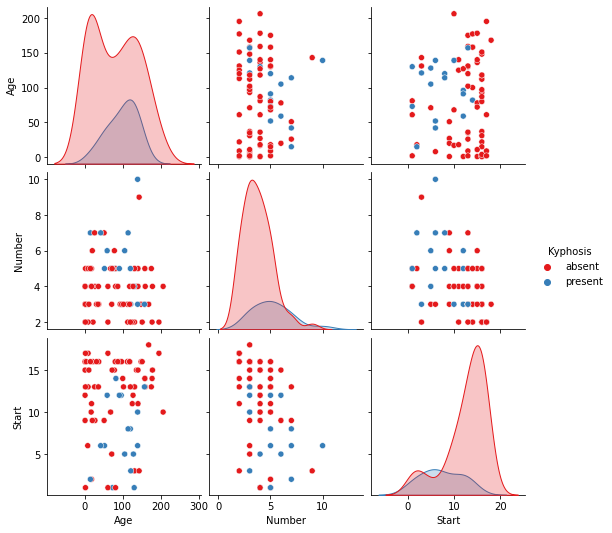

In [17]:
_ = sns.pairplot(df, hue='Kyphosis', palette='Set1')

In [18]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

## Decision Tree

In [39]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[14,  6],
       [ 3,  2]], dtype=int64)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.82      0.70      0.76        20
     present       0.25      0.40      0.31         5

    accuracy                           0.64        25
   macro avg       0.54      0.55      0.53        25
weighted avg       0.71      0.64      0.67        25



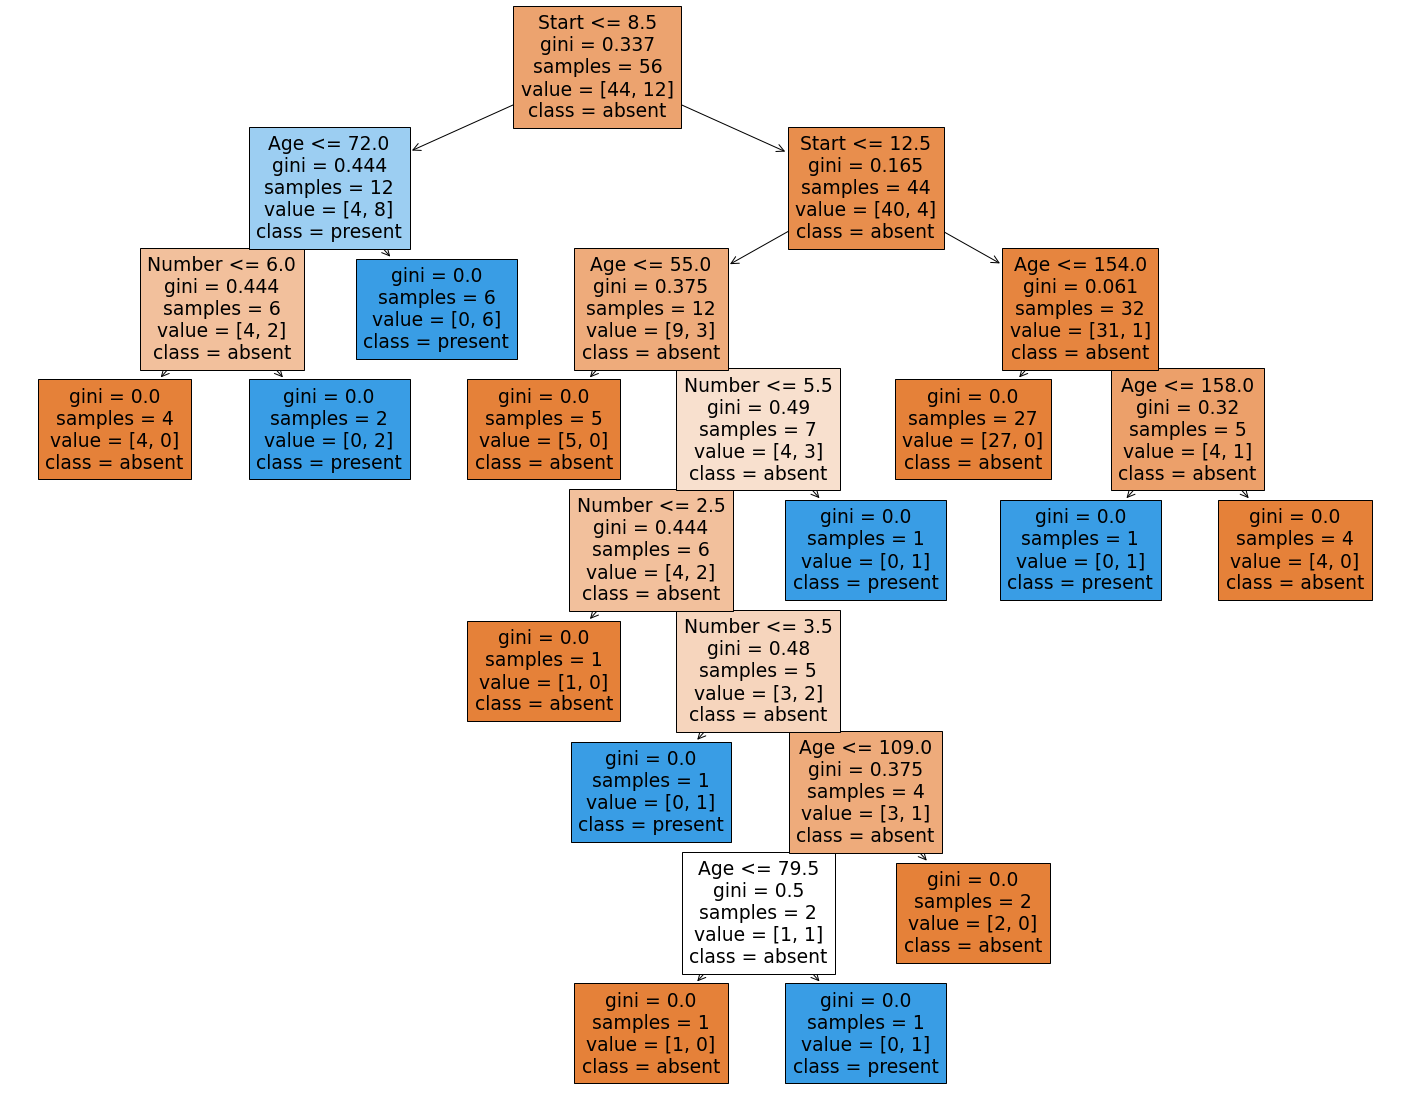

In [46]:
fig = plt.figure(figsize=(25,20))
_= plot_tree(dt, feature_names=X_train.columns, class_names=['absent', 'present'], filled=True)

## Random Forest

In [49]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [50]:
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[18,  2],
       [ 3,  2]], dtype=int64)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

    accuracy                           0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25

